<a href="https://colab.research.google.com/github/AnushreePai29/bus-reservation/blob/main/FY_inception_v3_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importting necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#unzippping the train set
import zipfile
zip_ref = zipfile.ZipFile('/content/train.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#unzippping the valid set
import zipfile
zip_ref = zipfile.ZipFile('/content/valid.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#unzippping the test set
import zipfile
zip_ref = zipfile.ZipFile('/content/test.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#importting necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input
import keras

print(keras.__version__)

2.15.0


In [ ]:
#importting necessary libraries
%%capture
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

from IPython.display import SVG


from time import time
import numpy as np

In [ ]:
#importting necessary libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,AvgPool2D

In [ ]:
# Number of classes in the classification problem (binary classification in this case)
num_classes = 2

# Size to which images will be resized before input to the model
image_resize = 224

# Number of samples to process in each iteration during training
batch_size_training = 100
# Number of samples to process in each iteration during validation
batch_size_validation = 100

In [ ]:
# Image data generator for real-time data augmentation during training
# preprocessing_function applies preprocessing to each image before feeding it to the model
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [ ]:
# Generate a training data iterator from images in the '/content/train' directory
# Images are resized to (image_resize, image_resize), and labels are one-hot encoded (categorical)
train_generator = data_generator.flow_from_directory(
    '/content/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 2338 images belonging to 2 classes.


In [ ]:
import numpy as np
#optionally check data types before conversion
data2_batch = next(train_generator)
print("Original Data Types: ")
print("Violence: ",data2_batch[0].dtype)
print("Non_Violence: ",data2_batch[1].dtype)

#convert the image dataset from float32 to int64
train_generator = ((np.array(batch[0],dtype =np.int64),np.array(batch[1],dtype =np.int64)) for batch in train_generator)

#optionally,check the data type after conversion
data2_batch = next(train_generator)
print("Original Data Types: ")
print("Violence: ",data2_batch[0].dtype)
print("Non_Violence: ",data2_batch[1].dtype)

Original Data Types: 
Violence:  float32
Non_Violence:  float32
Original Data Types: 
Violence:  int64
Non_Violence:  int64


In [ ]:
# Generate a validation data iterator from images in the '/content/valid' directory
# Images are resized to (image_resize, image_resize), and labels are encoded in categorical format
validation_generator = data_generator.flow_from_directory(
    '/content/valid',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical')

Found 662 images belonging to 2 classes.


In [ ]:
import numpy as np
#optionally check data types before conversion
data2_batch = next(validation_generator)
print("Original Data Types: ")
print("Violence: ",data2_batch[0].dtype)
print("Non_Violence: ",data2_batch[1].dtype)

#convert the image dataset from float32 to int64
validation_generator = ((np.array(batch[0],dtype =np.int64),np.array(batch[1],dtype =np.int64)) for batch in validation_generator)

#optionally,check the data type after conversion
data2_batch = next(validation_generator)
print("Original Data Types: ")
print("Violence: ",data2_batch[0].dtype)
print("Non_Violence: ",data2_batch[1].dtype)

Original Data Types: 
Violence:  float32
Non_Violence:  float32
Original Data Types: 
Violence:  int64
Non_Violence:  int64


In [ ]:
!pip install tensorflow


In [ ]:
# Create a Sequential model
model = Sequential()

In [ ]:
# Add InceptionV3 pre-trained model as a layer
# Parameters:
#   - include_top=False: Exclude the top (fully connected) layers
#   - pooling='avg': Global average pooling for spatial data reduction
#   - weights='imagenet': Initialize with pre-trained weights on ImageNet
from tensorflow.keras.applications import InceptionV3

model.add(InceptionV3(
    include_top=False,
    pooling='avg',
    weights='imagenet',
))

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
# Add a Dense (fully connected) layer for classification
# Parameters:
#   - num_classes: Number of output classes in the classification task
#   - activation='softmax': Use softmax activation for multi-class classification
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Access the layers of the Sequential model
model.layers

In [ ]:
# Access the layers of the first layer (InceptionV3) within the Sequential model
model.layers[0].layers

In [ ]:
# Set the layers of the first layer (InceptionV3) to be non-trainable
model.layers[0].trainable = False

In [ ]:
# Display a summary of the model architecture, including layer names, types, and parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 21806882 (83.19 MB)
Trainable params: 4098 (16.01 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [ ]:
# Compile the model with specified optimizer, loss function, and evaluation metrics
# Parameters:
#   - optimizer='adam': Use the Adam optimizer for gradient descent
#   - loss='categorical_crossentropy': Apply categorical crossentropy as the loss function for multi-class classification
#   - metrics=['accuracy']: Evaluate the model's performance using accuracy during training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Calculate the number of steps per epoch for training and validation datasets
# based on the total number of samples and batch sizes
steps_per_epoch_training = 2338/ batch_size_training
steps_per_epoch_validation = 662/ batch_size_validation
# Set the number of epochs for training
num_epochs = 10

In [ ]:
# Train the model using the fit method
# Parameters:
#   - train_generator: Data generator for training images and labels
#   - steps_per_epoch: Number of steps to take per epoch during training
#   - epochs: Number of times to iterate over the entire training dataset
#   - validation_data: Data generator for validation images and labels
#   - validation_steps: Number of steps to take per epoch during validation
#   - verbose=1: Display training progress information
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

Epoch 1/10
23/23 [==============================] - 32s 859ms/step - loss: 0.4372 - accuracy: 0.8815 - val_loss: 0.3328 - val_accuracy: 0.9532
Epoch 2/10
23/23 [==============================] - 12s 516ms/step - loss: 0.2424 - accuracy: 0.9448 - val_loss: 0.2561 - val_accuracy: 0.9486
Epoch 3/10
23/23 [==============================] - 14s 610ms/step - loss: 0.1966 - accuracy: 0.9487 - val_loss: 0.2310 - val_accuracy: 0.9471
Epoch 4/10
23/23 [==============================] - 11s 467ms/step - loss: 0.1764 - accuracy: 0.9474 - val_loss: 0.2043 - val_accuracy: 0.9486
Epoch 5/10
23/23 [==============================] - 11s 474ms/step - loss: 0.1637 - accuracy: 0.9482 - val_loss: 0.2017 - val_accuracy: 0.9486
Epoch 6/10
23/23 [==============================] - 11s 487ms/step - loss: 0.1557 - accuracy: 0.9487 - val_loss: 0.1800 - val_accuracy: 0.9577
Epoch 7/10
23/23 [==============================] - 11s 494ms/step - loss: 0.1451 - accuracy: 0.9538 - val_loss: 0.1954 - val_accuracy: 0.9517

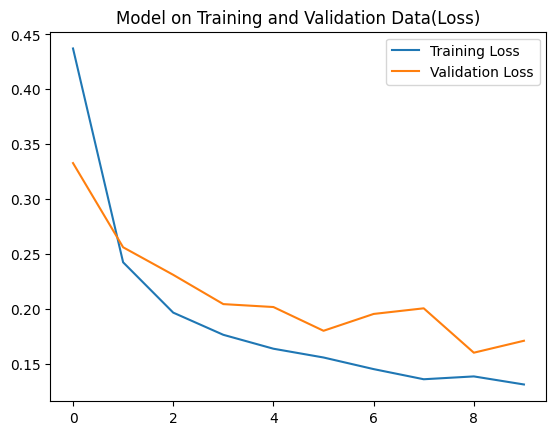

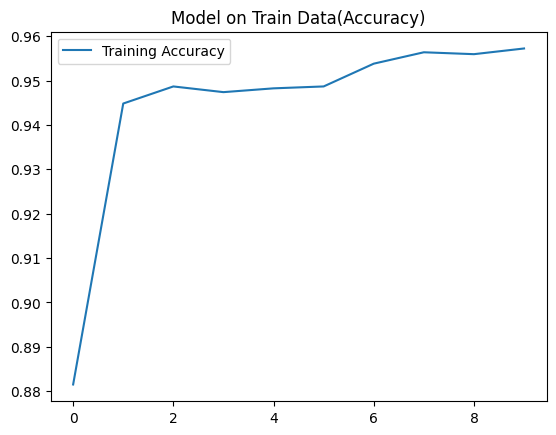

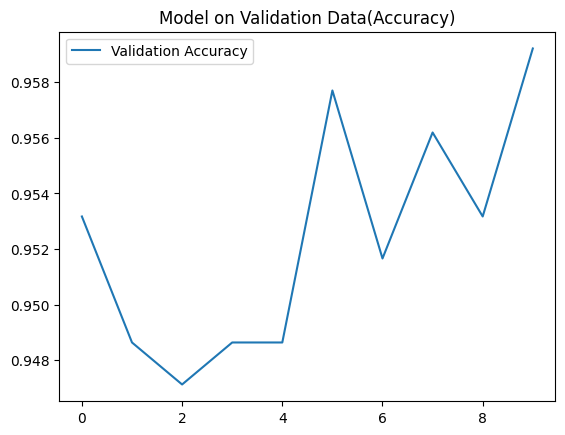

In [ ]:
import matplotlib.pyplot as plt
# Visualize the training and validation loss over epochs
# Plot training and validation loss
plt.title('Model on Training and Validation Data(Loss)')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
# Visualize the training accuracy over epochs
# Plot training and validation accuracy
plt.title('Model on Train Data(Accuracy)')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.legend()
plt.show()
# Visualize the validation accuracy over epochs
plt.title('Model on Validation Data(Accuracy)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
#saved the model
model.save('inceptionv3_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Generate a test data iterator from images in the '/content/test' directory
# Images are resized to (image_resize, image_resize) without shuffling
test_generator = data_generator.flow_from_directory(
    '/content/test',
    target_size=(image_resize, image_resize),
    shuffle=False)

Found 334 images belonging to 2 classes.


In [ ]:
# Calculate the number of steps per epoch for the test dataset
# based on the total number of test samples and the batch size used for validation
steps_per_epoch_test = 334/ batch_size_validation

In [ ]:
# Evaluate the trained model on the test dataset
# Parameters:
#   - test_generator: Data generator for test images and labels
#   - steps=steps_per_epoch_test: Number of steps to take during evaluation, based on the test dataset size and batch size
score = model.evaluate(test_generator, steps=steps_per_epoch_test)

3/3 [==============================] - 4s 89ms/step - loss: 0.6149 - accuracy: 0.8203


In [ ]:
# Print the accuracy and error rate of the InceptionV3 model on the test dataset
# Format the output to display accuracy in percentage and calculate the error rate

print('Accuracy of Inception V3: {}% \n Error: {}'.format(score[1], 1 - score[1]))

Accuracy of Inception V3: 0.8203125% 
 Error: 0.1796875


In [ ]:
# Fine-tune the model on the test dataset for a specified number of epochs
# Parameters:
#   - test_generator: Data generator for test images and labels
#   - steps_per_epoch=steps_per_epoch_test: Number of steps to take per epoch during fine-tuning
#   - epochs=num_epochs: Number of times to iterate over the entire test dataset for fine-tuning
#   - verbose=1: Display fine-tuning progress information
history2 = model.fit(
    test_generator,
    steps_per_epoch=steps_per_epoch_test,
    epochs=num_epochs,
    verbose=1,

)

Epoch 1/10
3/3 [==============================] - 5s 928ms/step - loss: 0.0414 - accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 0s 121ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 0s 100ms/step - loss: 1.8963 - accuracy: 0.7727
Epoch 4/10
3/3 [==============================] - 0s 98ms/step - loss: 1.6471 - accuracy: 0.3182
Epoch 5/10
3/3 [==============================] - 0s 108ms/step - loss: 0.3322 - accuracy: 0.8906
Epoch 6/10
3/3 [==============================] - 0s 92ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 0s 94ms/step - loss: 1.7593 - accuracy: 0.7727
Epoch 8/10
3/3 [==============================] - 0s 118ms/step - loss: 8.2520e-04 - accuracy: 1.0000
Epoch 9/10
3/3 [==============================] - 0s 131ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - 0s 107ms/step - loss: 0.3908 - accuracy: 0.8273


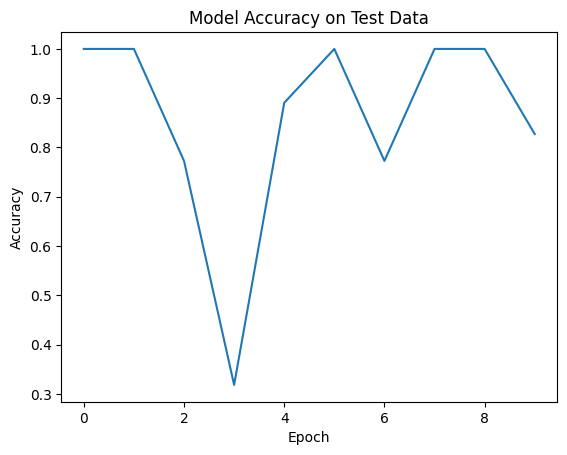

In [ ]:
# Plot the test history for accuracy
plt.plot(history2.history['accuracy'])
plt.title('Model Accuracy on Test Data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
import numpy as np

In [ ]:
predict =model.predict_generator(test_generator, steps=steps_per_epoch_test)


<ipython-input-36-3e04f36b9391>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict =model.predict_generator(test_generator, steps=steps_per_epoch_test)


In [ ]:
label2index = test_generator.class_indices

# obtain the list of classes
list_of_label = list(label2index.keys())
print("The list of classes: ", list_of_label)

The list of classes:  ['Non_Violence', 'Violence']


In [ ]:
print("GoogleNet Predictions :")
for i in range(0,10):
    pred_class = np.argmax(predict[i])
    pred_label = list_of_label[pred_class]
    print('Prediction :{}'.format(
        pred_label,
        predict[i][pred_class]))

GoogleNet Predictions :
Prediction :Non_Violence
Prediction :Non_Violence
Prediction :Non_Violence
Prediction :Non_Violence
Prediction :Non_Violence
Prediction :Violence
Prediction :Non_Violence
Prediction :Non_Violence
Prediction :Non_Violence
Prediction :Non_Violence
